In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"data.txt", encoding='utf-8', sep =';')
df

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,АбрауДюрсо,W,20150105,0,90.0,200
1,АбрауДюрсо,W,20150112,0,94.5,2700
2,АбрауДюрсо,W,20150119,0,99.0,800
3,АбрауДюрсо,W,20150126,0,93.0,1000
4,АбрауДюрсо,W,20150202,0,93.0,0
...,...,...,...,...,...,...
970,ЛУКОЙЛ,W,20210222,0,5575.5,6489151
971,ЛУКОЙЛ,W,20210301,0,6236.0,8485835
972,ЛУКОЙЛ,W,20210308,0,6356.0,6099744
973,ЛУКОЙЛ,W,20210315,0,6078.0,10268620


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  975 non-null    object 
 1   <PER>     975 non-null    object 
 2   <DATE>    975 non-null    int64  
 3   <TIME>    975 non-null    int64  
 4   <CLOSE>   975 non-null    float64
 5   <VOL>     975 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 45.8+ KB


In [4]:
df = df.drop(columns = ['<PER>' , '<TIME>'])


In [5]:
df.columns = ['Ticker', 'Date', 'Price', 'Volume']
df['Date'] = pd.Series(list(range(0, 325))+list(range(0, 325))+list(range(0, 325)))
df

,Ticker,Date,Price,Volume
0,АбрауДюрсо,0,90.0,200
1,АбрауДюрсо,1,94.5,2700
2,АбрауДюрсо,2,99.0,800
3,АбрауДюрсо,3,93.0,1000
4,АбрауДюрсо,4,93.0,0
...,...,...,...,...
970,ЛУКОЙЛ,320,5575.5,6489151
971,ЛУКОЙЛ,321,6236.0,8485835
972,ЛУКОЙЛ,322,6356.0,6099744
973,ЛУКОЙЛ,323,6078.0,10268620


In [6]:
df['Yield'] = df['Price'].pct_change()
import numpy as np
df['Log_Yield'] = df['Price']/df['Price'].shift(1)
df = df.drop([0, 325, 650])
df['Log_Yield'] = np.log(df['Log_Yield'])
df['Log_Volume'] = df['Volume'].apply(lambda x : 0 if (x == 0) else np.log(x))
df


,Ticker,Date,Price,Volume,Yield,Log_Yield,Log_Volume
1,АбрауДюрсо,1,94.5,2700,0.050000,0.048790,7.901007
2,АбрауДюрсо,2,99.0,800,0.047619,0.046520,6.684612
3,АбрауДюрсо,3,93.0,1000,-0.060606,-0.062520,6.907755
4,АбрауДюрсо,4,93.0,0,0.000000,0.000000,0.000000
5,АбрауДюрсо,5,110.0,6800,0.182796,0.167881,8.824678
...,...,...,...,...,...,...,...
970,ЛУКОЙЛ,320,5575.5,6489151,-0.010208,-0.010260,15.685642
971,ЛУКОЙЛ,321,6236.0,8485835,0.118465,0.111957,15.953909
972,ЛУКОЙЛ,322,6356.0,6099744,0.019243,0.019060,15.623757
973,ЛУКОЙЛ,323,6078.0,10268620,-0.043738,-0.044724,16.144603


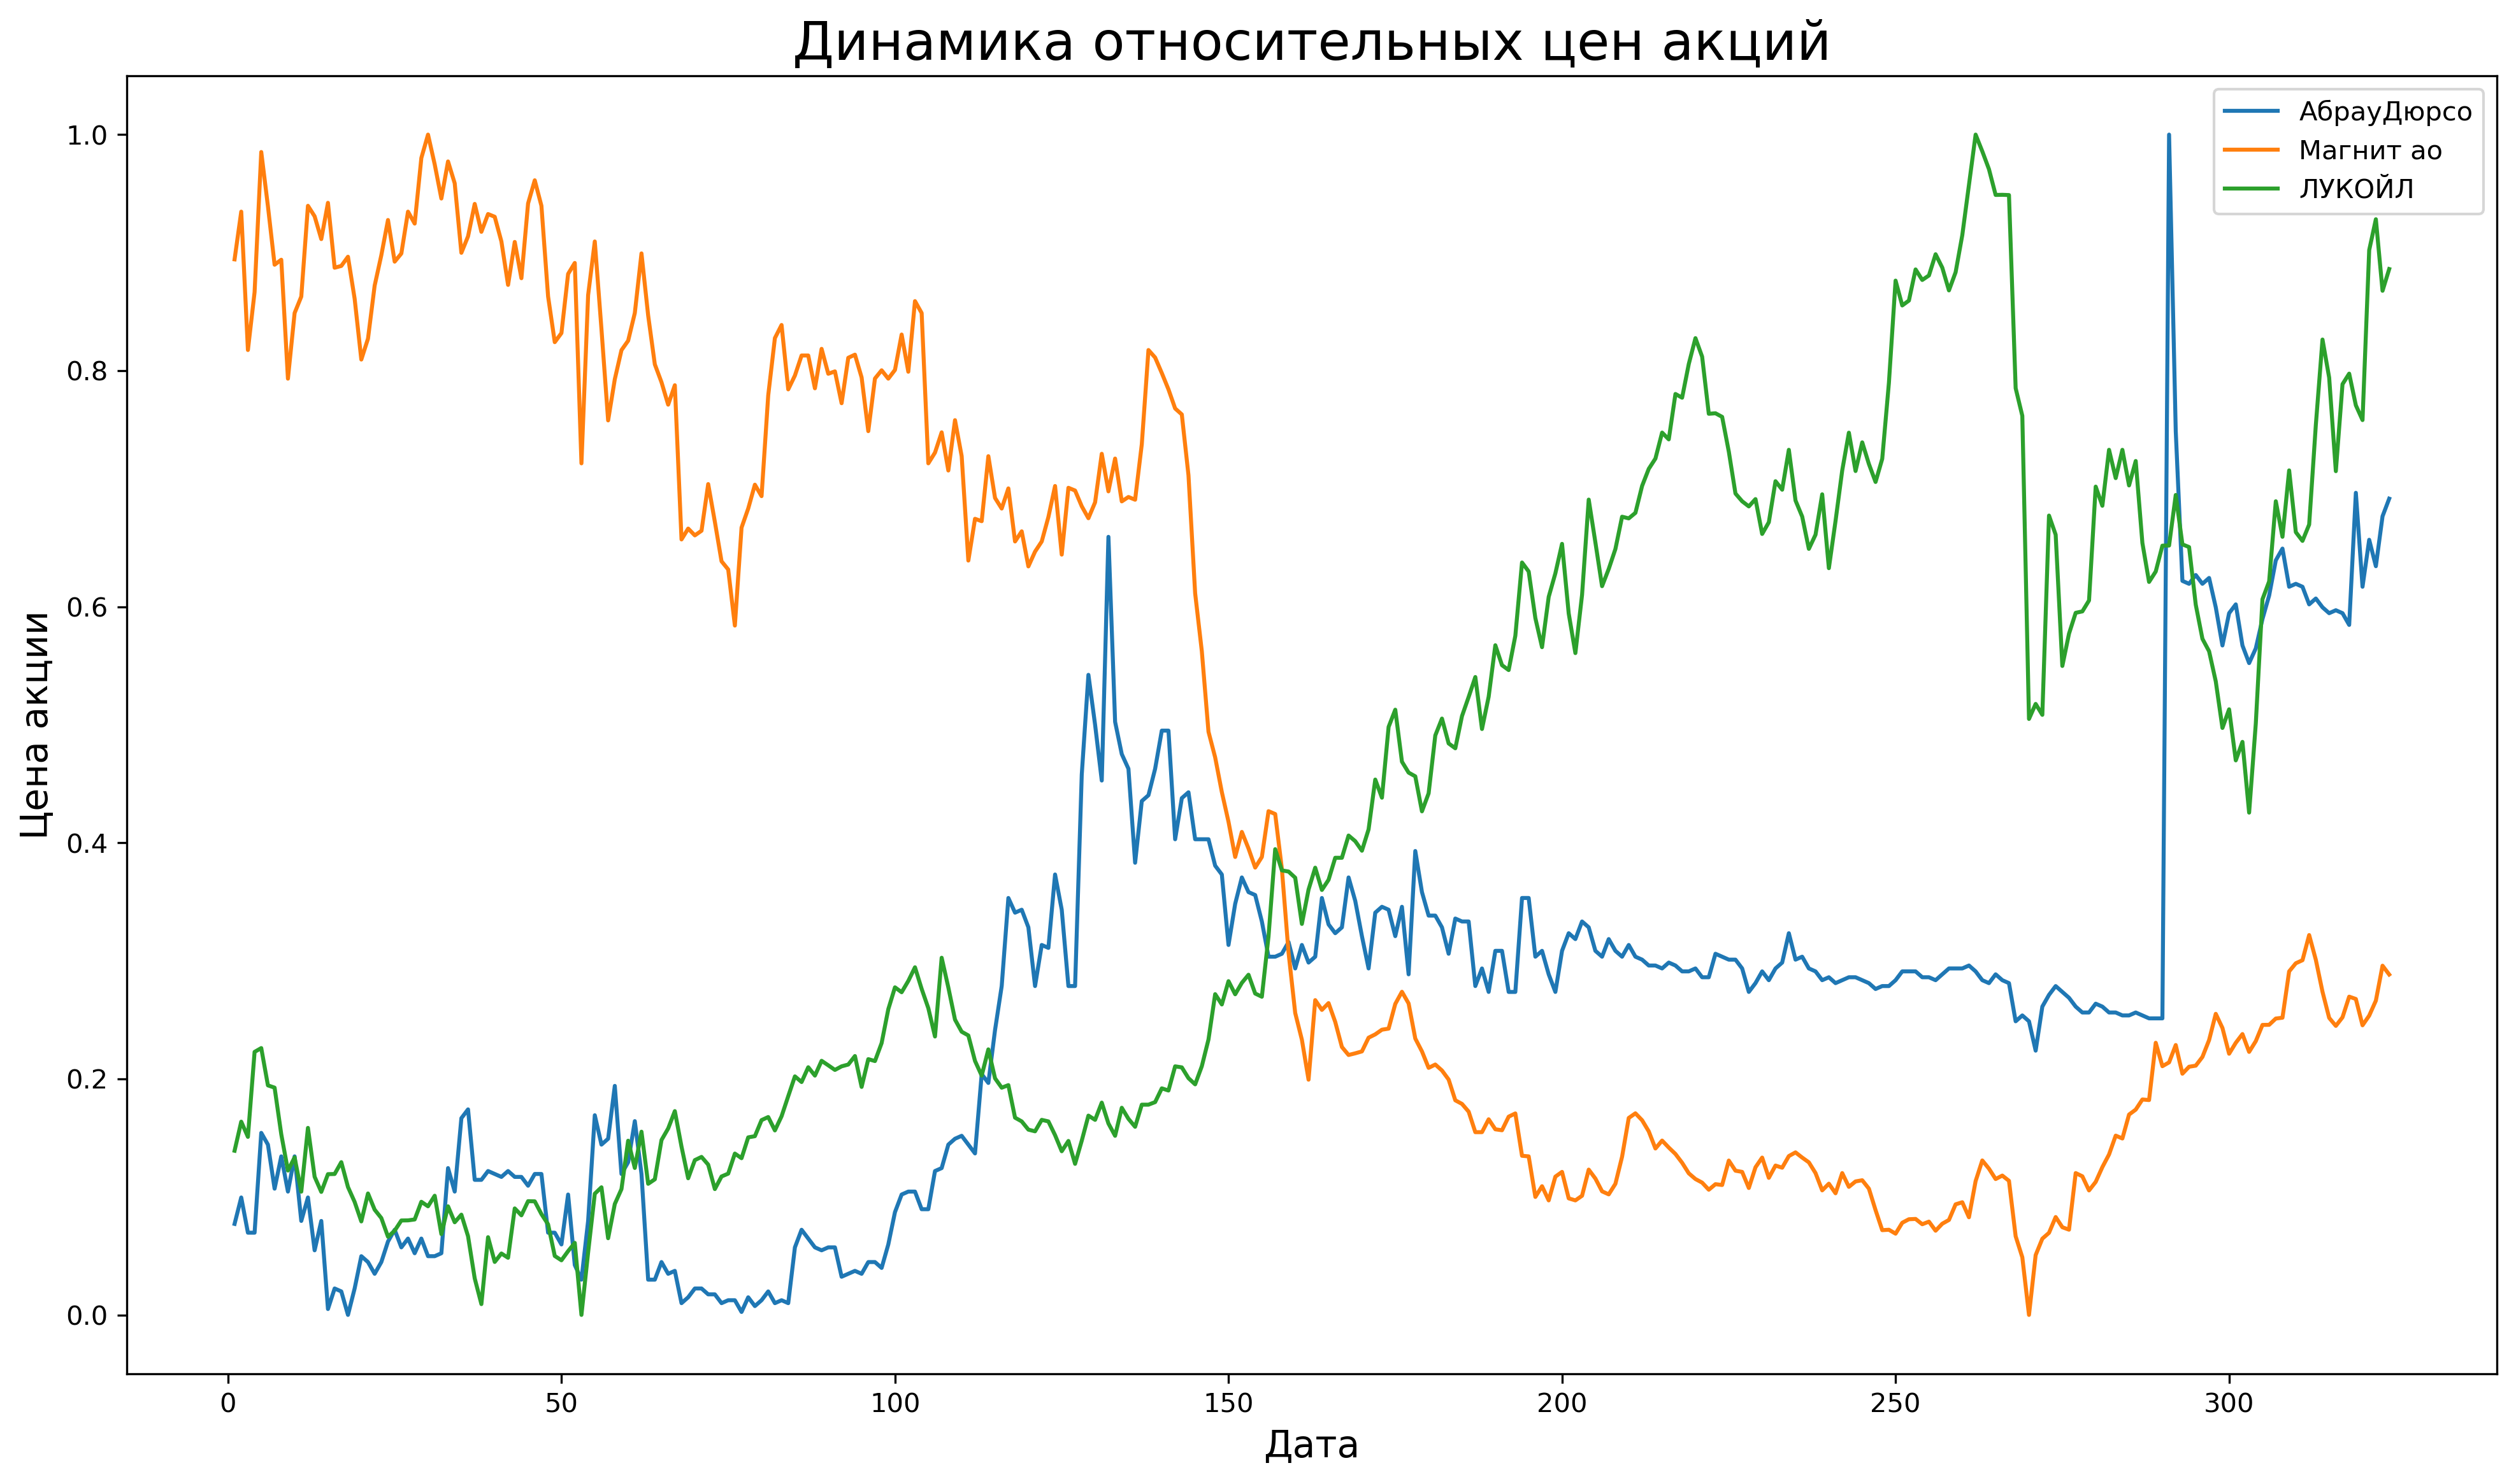

In [7]:
AmbauMax = df[df['Ticker'] == 'АбрауДюрсо']['Price'].max()
AmbauMin = df[df['Ticker'] == 'АбрауДюрсо']['Price'].min()
MagnitMax = df[df['Ticker'] == 'Магнит ао']['Price'].max()
MagnitMin = df[df['Ticker'] == 'Магнит ао']['Price'].min()
LukoilMax = df[df['Ticker'] == 'ЛУКОЙЛ']['Price'].max()
LukoilMin = df[df['Ticker'] == 'ЛУКОЙЛ']['Price'].min()

import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (16,9), dpi = 300)
ax = fig.add_subplot(111)
df['Relative Price'] = (df[df['Ticker'] == 'АбрауДюрсо']['Price'] - AmbauMin)/(AmbauMax - AmbauMin) 
sns.lineplot(data=df, x = 'Date', y="Relative Price", label = 'АбрауДюрсо')
df['Relative Price'] = (df[df['Ticker'] == 'Магнит ао']['Price'] - MagnitMin)/(MagnitMax - MagnitMin)
sns.lineplot(data=df, x = 'Date', y="Relative Price", label = 'Магнит ао')
df['Relative Price'] = (df[df['Ticker'] == 'ЛУКОЙЛ']['Price'] - LukoilMin)/(LukoilMax - LukoilMin)
sns.lineplot(data=df, x = 'Date', y="Relative Price", label = 'ЛУКОЙЛ')
ax.set_xlabel('Дата', size = 14)
ax.set_ylabel('Цена акции', size = 14)
ax.set_title('Динамика относительных цен акций', size = 20)
ax.legend()
plt.show()

df = df.drop(columns = ['Relative Price'])

In [8]:
Abrau = df[df['Ticker'] == 'АбрауДюрсо']
Magnit = df[df['Ticker'] == 'Магнит ао']
Lukoil = df[df['Ticker'] == 'ЛУКОЙЛ']


In [9]:
full_demo = Abrau.merge(Magnit, on = 'Date')
full = full_demo.merge(Lukoil, on = 'Date')


In [10]:
full = full.drop(columns = ['Ticker_x', 'Ticker_y', 'Ticker'])
full.columns = ['Date', 'Abrau_Price', 'Abrau_Volume', 'Abrau_Yield', 'Abrau_Log_Yield', 'Abrau_Log_Volume',
               'Magnit_Price', 'Magnit_Volume', 'Magnit_Yield', 'Magnit_Log_Yield', 'Magnit_Log_Volume',
               'Lukoil_Price', 'Lukoil_Volume', 'Lukoil_Yield', 'Lukoil_Log_Yield', 'Lukoil_Log_Volume']

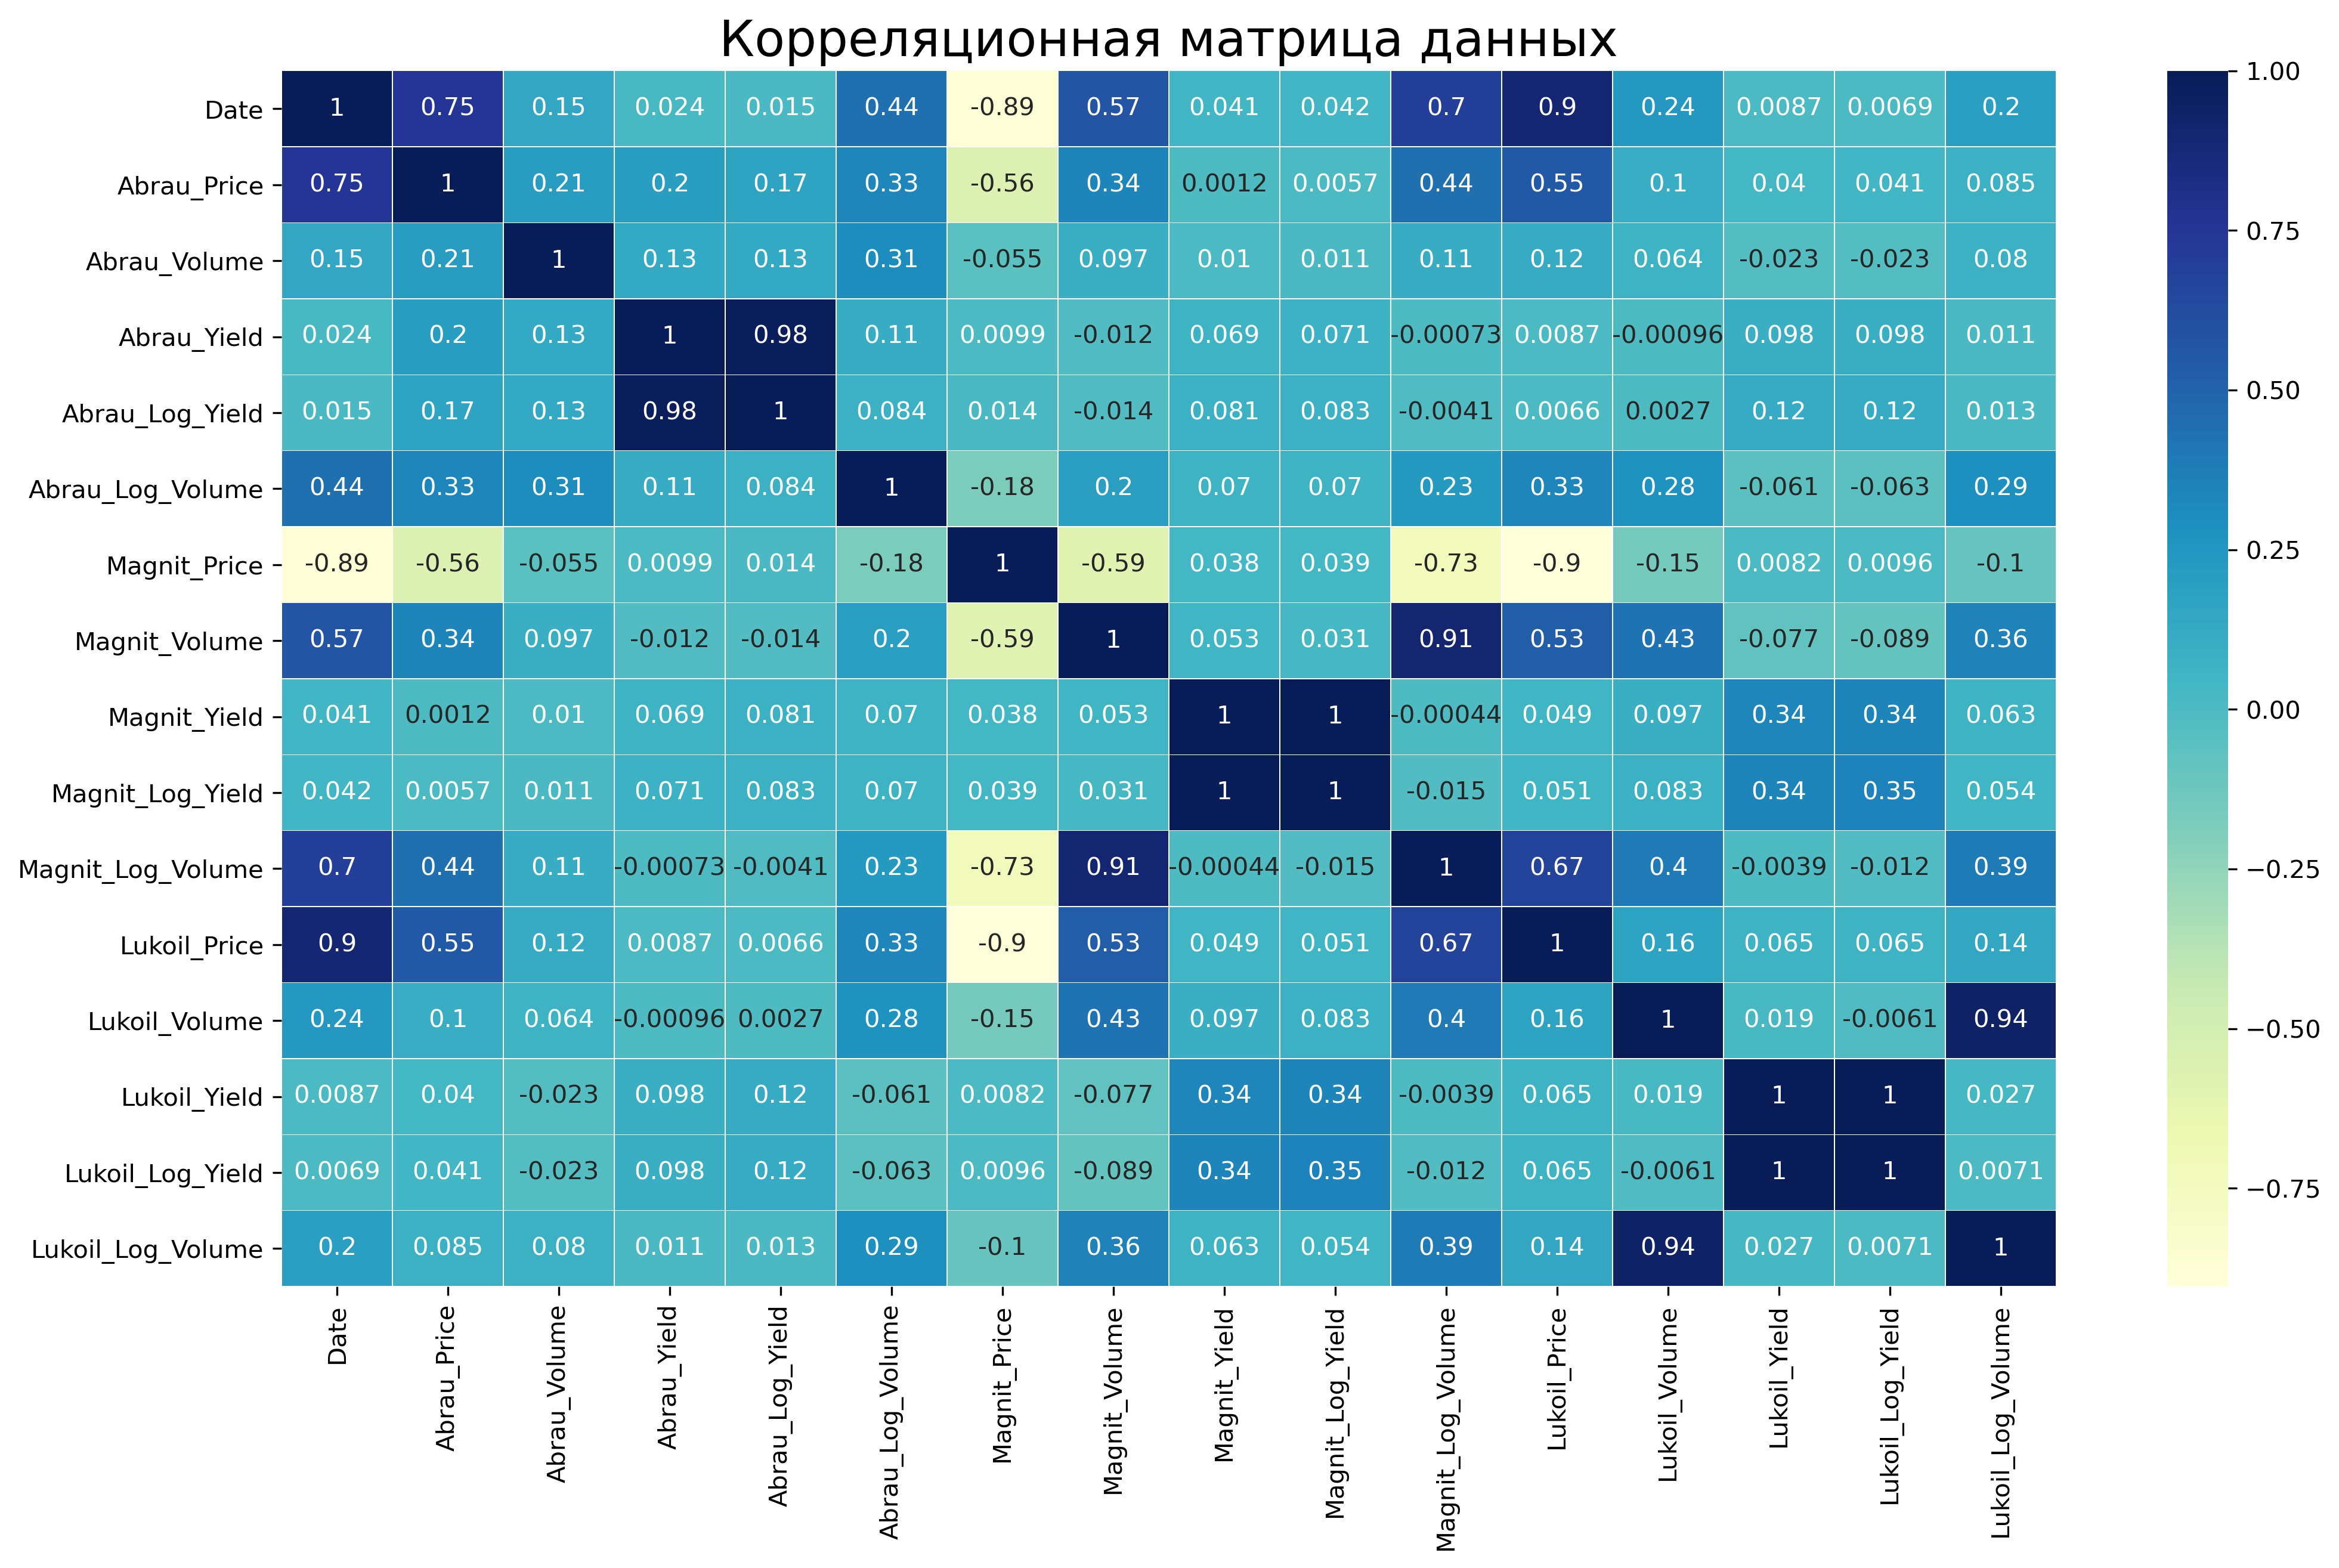

In [11]:
corrmat = full.corr()
f, ax = plt.subplots(figsize =(16, 9), dpi = 300)
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot = True)
ax.set_title('Корреляционная матрица данных', size = 20)
plt.show()

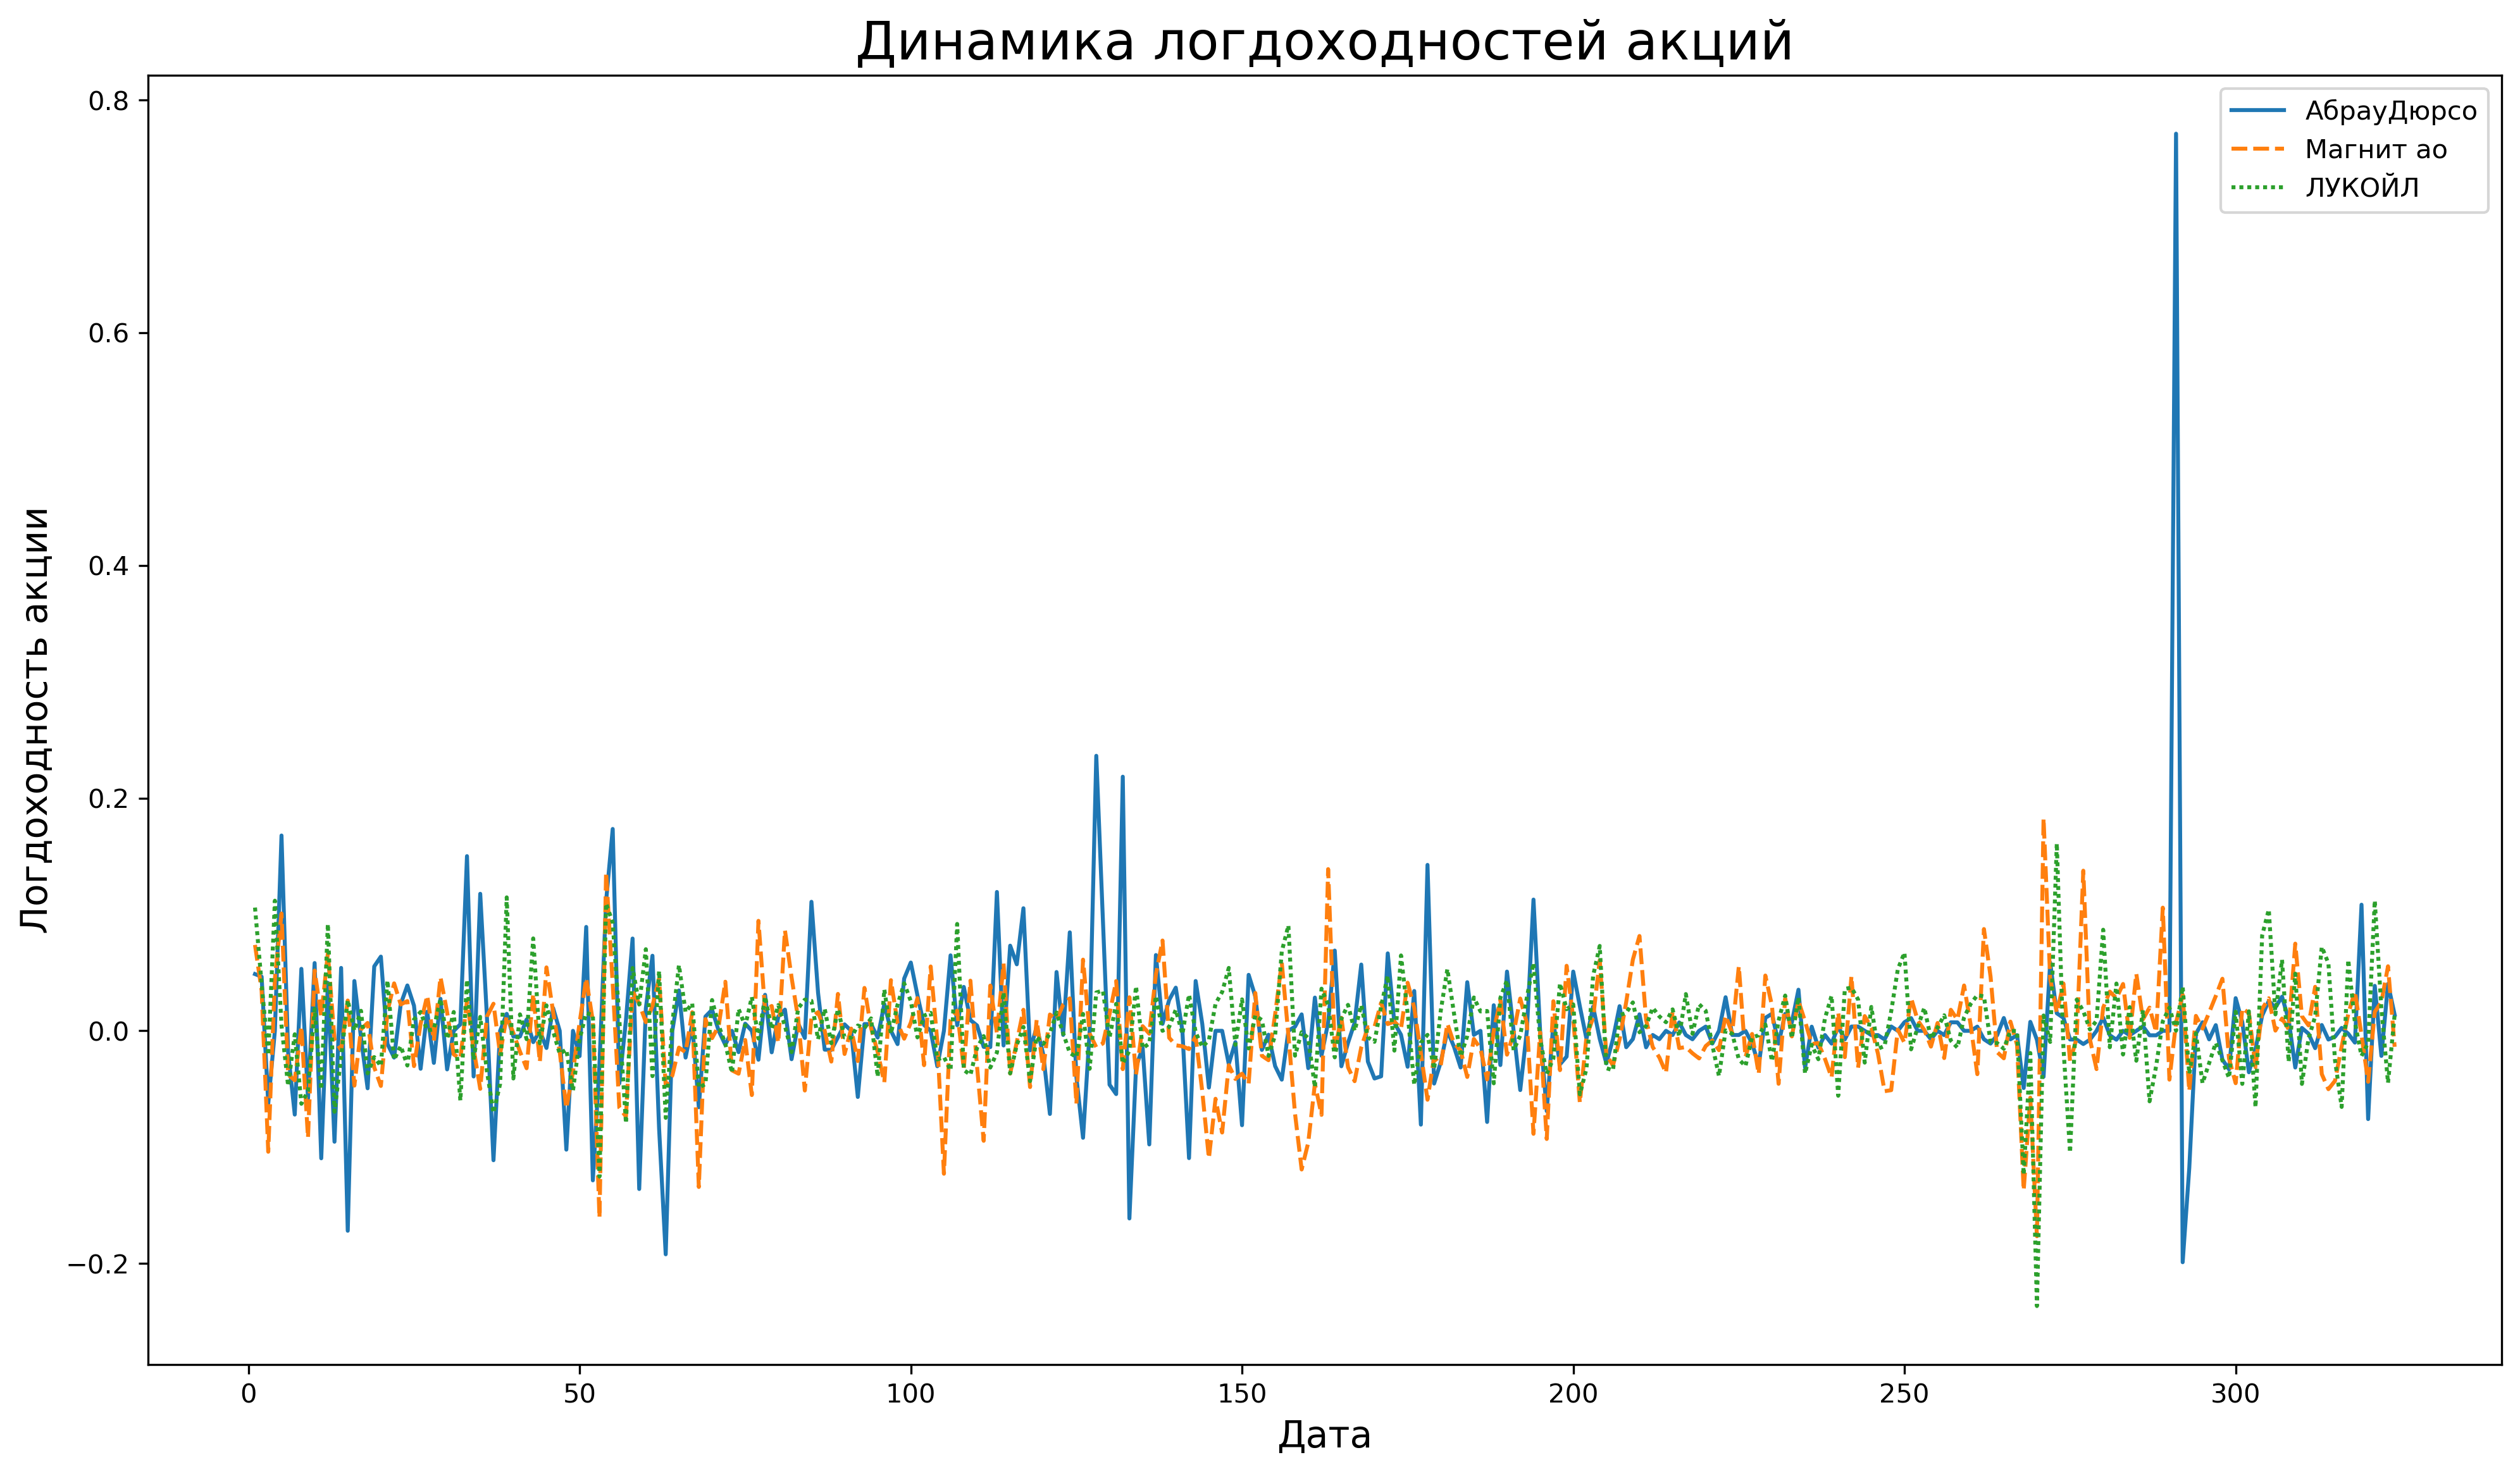

In [12]:
fig = plt.figure(figsize = (16,9), dpi = 300)
ax = fig.add_subplot(111)
sns.lineplot(data=df, x = 'Date', y="Log_Yield", hue = 'Ticker', style = 'Ticker')
ax.set_xlabel('Дата', size = 14)
ax.set_ylabel('Логдоходность акции', size = 14)
ax.set_title('Динамика логдоходностей акций', size = 20)
ax.legend()
plt.show()

In [13]:
full.describe()

,Date,Abrau_Price,Abrau_Volume,Abrau_Yield,Abrau_Log_Yield,Abrau_Log_Volume,Magnit_Price,Magnit_Volume,Magnit_Yield,Magnit_Log_Yield,Magnit_Log_Volume,Lukoil_Price,Lukoil_Volume,Lukoil_Yield,Lukoil_Log_Yield,Lukoil_Log_Volume
count,324.00000,324.000000,3.240000e+02,324.000000,324.000000,324.000000,324.000000,3.240000e+02,324.000000,324.000000,324.000000,324.000000,3.240000e+02,324.000000,324.000000,324.000000
mean,162.50000,132.554012,6.713654e+04,0.005200,0.002731,8.307733,7053.645062,1.362252e+06,-0.001120,-0.002091,13.869467,3998.283642,4.738164e+06,0.003630,0.002833,15.248068
std,93.67497,35.779113,6.792588e+05,0.082099,0.065943,2.042701,3196.478644,1.089781e+06,0.044087,0.044151,0.704975,1264.168080,2.621839e+06,0.039908,0.039898,0.484159
min,1.00000,79.000000,0.000000e+00,-0.180357,-0.198887,0.000000,2501.000000,2.019980e+05,-0.161863,-0.176574,12.216013,2098.000000,9.828960e+05,-0.210658,-0.236556,13.798259
25%,81.75000,102.000000,1.300000e+03,-0.014670,-0.014779,7.170120,3860.125000,5.975045e+05,-0.025670,-0.026005,13.300517,2824.225000,2.917205e+06,-0.019019,-0.019202,14.886136
50%,162.50000,136.000000,4.500000e+03,0.000000,0.000000,8.411833,5461.750000,1.010439e+06,0.000000,0.000000,13.825895,3823.250000,3.976399e+06,0.000292,0.000292,15.195886
75%,243.25000,146.000000,1.247000e+04,0.014248,0.014147,9.431080,10350.250000,1.864268e+06,0.022054,0.021814,14.438376,5171.750000,5.680644e+06,0.022669,0.022416,15.552575
max,324.00000,280.000000,1.192961e+07,1.162162,0.771109,16.294534,12396.000000,7.285249e+06,0.200520,0.182755,15.801362,6685.000000,1.970643e+07,0.174831,0.161124,16.796455


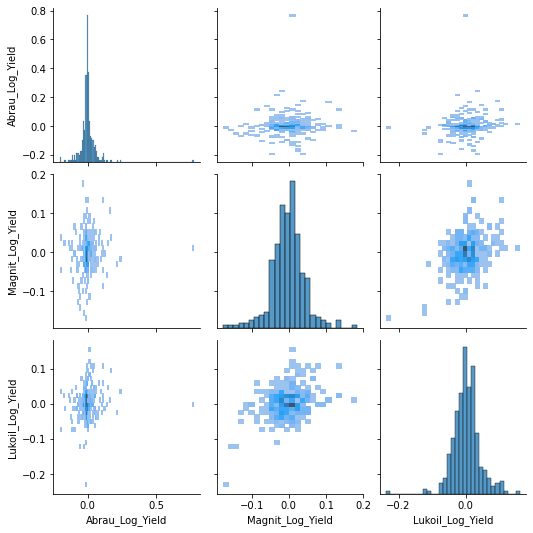

In [14]:
sns.pairplot(full[['Abrau_Log_Yield', 'Magnit_Log_Yield', 'Lukoil_Log_Yield']], kind = 'hist')
plt.show()

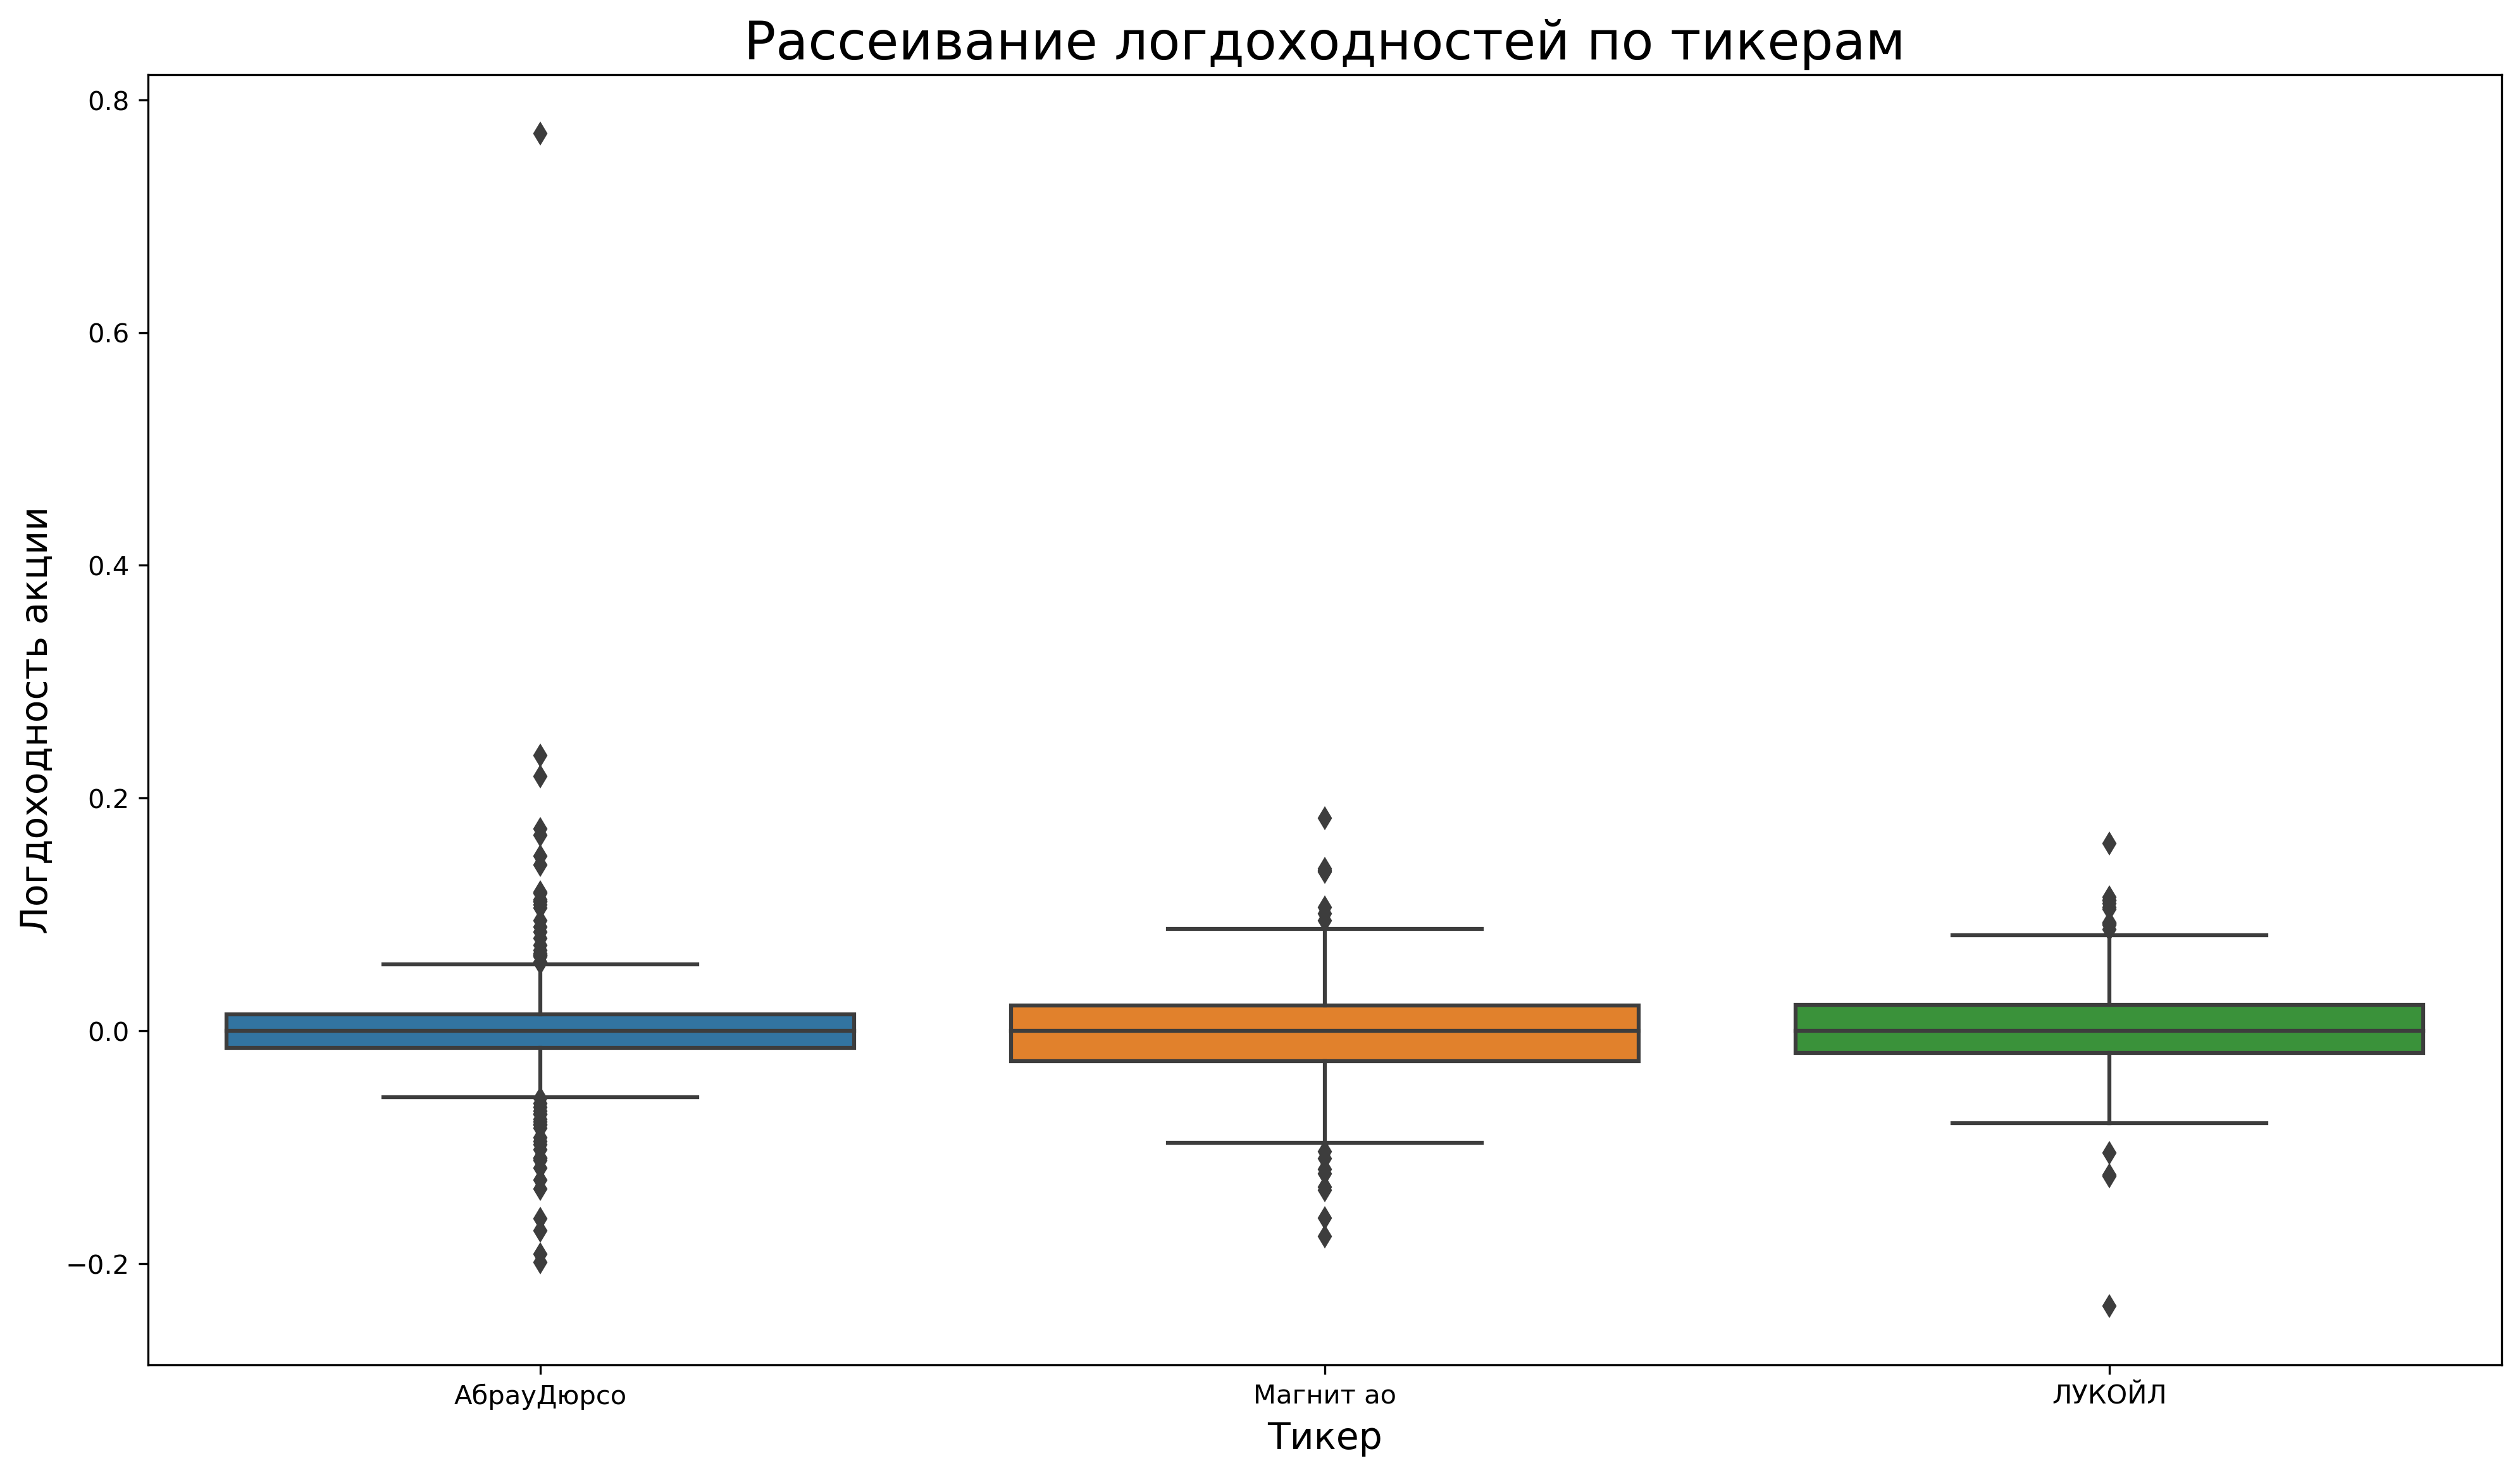

In [15]:
fig = plt.figure(figsize = (16,9), dpi = 300)
ax = fig.add_subplot(111)
sns.boxplot(x="Ticker", y="Log_Yield", data=df)
ax.set_xlabel('Тикер', size = 14)
ax.set_ylabel('Логдоходность акции', size = 14)
ax.set_title('Рассеивание логдоходностей по тикерам', size = 20)
plt.show()


In [16]:
quartiles = full[['Abrau_Log_Yield', 'Magnit_Log_Yield', 'Lukoil_Log_Yield']].quantile([0.25, 0.75])
quartiles = quartiles.transpose()
quartiles['IQR'] = quartiles[0.75] - quartiles[0.25]
quartiles['Min'] = quartiles[0.25] - 1.5*quartiles['IQR']
quartiles['Max'] = quartiles[0.75] + 1.5*quartiles['IQR']
quartiles

,0.25,0.75,IQR,Min,Max
Abrau_Log_Yield,-0.014779,0.014147,0.028926,-0.058168,0.057536
Magnit_Log_Yield,-0.026005,0.021814,0.047819,-0.097734,0.093543
Lukoil_Log_Yield,-0.019202,0.022416,0.041618,-0.081630,0.084843


In [17]:
clear_full = full.query('Abrau_Log_Yield <= 0.057536 & Abrau_Log_Yield >= -0.058168 \
& Magnit_Log_Yield <= 0.093543 & Magnit_Log_Yield >= -0.097734 & \
Lukoil_Log_Yield <= 0.084843 & Lukoil_Log_Yield >= -0.081630')


In [18]:
clear_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 1 to 323
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               249 non-null    int64  
 1   Abrau_Price        249 non-null    float64
 2   Abrau_Volume       249 non-null    int64  
 3   Abrau_Yield        249 non-null    float64
 4   Abrau_Log_Yield    249 non-null    float64
 5   Abrau_Log_Volume   249 non-null    float64
 6   Magnit_Price       249 non-null    float64
 7   Magnit_Volume      249 non-null    int64  
 8   Magnit_Yield       249 non-null    float64
 9   Magnit_Log_Yield   249 non-null    float64
 10  Magnit_Log_Volume  249 non-null    float64
 11  Lukoil_Price       249 non-null    float64
 12  Lukoil_Volume      249 non-null    int64  
 13  Lukoil_Yield       249 non-null    float64
 14  Lukoil_Log_Yield   249 non-null    float64
 15  Lukoil_Log_Volume  249 non-null    float64
dtypes: float64(12), int64(4)
m

In [19]:
import scipy.stats as st

In [20]:
def pirson(row, alpha):
    stat, p = st.normaltest(clear_full[row]) 
    print('Statistics=%.3f, p-value=%.3f' % (stat, p))
    if p > alpha:
        print('Принять гипотезу о нормальности по критерию Пирсона для', row, ', a =', alpha)
    else:
        print('Отклонить гипотезу о нормальности по критерию Пирсона для', row, ', a =', alpha)

In [21]:
pirson('Abrau_Log_Yield', 0.05)
pirson('Magnit_Log_Yield', 0.05)
pirson('Lukoil_Log_Yield', 0.05)

Statistics=5.556, p-value=0.062
Принять гипотезу о нормальности по критерию Пирсона для Abrau_Log_Yield , a = 0.05
Statistics=0.335, p-value=0.846
Принять гипотезу о нормальности по критерию Пирсона для Magnit_Log_Yield , a = 0.05
Statistics=0.465, p-value=0.792
Принять гипотезу о нормальности по критерию Пирсона для Lukoil_Log_Yield , a = 0.05


In [22]:
def shapiro(row, alpha):
    stat, p = st.shapiro(clear_full[row]) # тест Шапиро-Уилк
    print('Statistics=%.3f, p-value=%.3f' % (stat, p))
    if p > alpha:
        print('Принять гипотезу о нормальности по критерию Шапиро-Уилка для', row, ', a =', alpha)
    else:
        print('Отклонить гипотезу о нормальности по критерию Шапиро-Уилка для', row, ', a =', alpha)

In [23]:
shapiro('Abrau_Log_Yield', 0.05)
shapiro('Magnit_Log_Yield', 0.05)
shapiro('Lukoil_Log_Yield', 0.05)

Statistics=0.970, p-value=0.000
Отклонить гипотезу о нормальности по критерию Шапиро-Уилка для Abrau_Log_Yield , a = 0.05
Statistics=0.997, p-value=0.882
Принять гипотезу о нормальности по критерию Шапиро-Уилка для Magnit_Log_Yield , a = 0.05
Statistics=0.994, p-value=0.415
Принять гипотезу о нормальности по критерию Шапиро-Уилка для Lukoil_Log_Yield , a = 0.05


In [24]:
def ks(row, alpha):
    stat, p = st.kstest(clear_full[row], 'norm')
    print('D=%.3f, p-value=%.3f' % (stat, p))
    if p > alpha:
        print('Принять гипотезу о нормальности по критерию Колмогорова-Смирнова для', row, ', a =', alpha)
    else:
        print('Отклонить гипотезу о нормальности по критерию Колмогорова-Смирнова для', row, ', a =', alpha)

In [25]:
ks('Abrau_Log_Yield', 0.05)
ks('Magnit_Log_Yield', 0.05)
ks('Lukoil_Log_Yield', 0.05)

D=0.477, p-value=0.000
Отклонить гипотезу о нормальности по критерию Колмогорова-Смирнова для Abrau_Log_Yield , a = 0.05
D=0.465, p-value=0.000
Отклонить гипотезу о нормальности по критерию Колмогорова-Смирнова для Magnit_Log_Yield , a = 0.05
D=0.470, p-value=0.000
Отклонить гипотезу о нормальности по критерию Колмогорова-Смирнова для Lukoil_Log_Yield , a = 0.05


In [26]:
print('Доверительный интервал для логдоходности Магнита -', st.t.interval(0.95, len(clear_full['Magnit_Log_Yield'])-1, 
                                                                          loc=clear_full['Magnit_Log_Yield'].mean(), 
                                                                          scale=st.sem(clear_full['Magnit_Log_Yield'])))

Доверительный интервал для логдоходности Магнита - (-0.006241668501839294, 0.0020182537808302774)


In [27]:
print('Доверительный интервал для логдоходности Лукойла -', st.t.interval(0.95, len(clear_full['Lukoil_Log_Yield'])-1, 
                                                                          loc=clear_full['Lukoil_Log_Yield'].mean(), 
                                                                          scale=st.sem(clear_full['Lukoil_Log_Yield'])))

Доверительный интервал для логдоходности Лукойла - (-0.0022761867745069416, 0.0051440519034112765)


In [28]:
def levene(row1, row2, alpha):
    stat, p = st.levene(clear_full[row1], clear_full[row2])
    print('W=%.3f, p-value=%.3f' % (stat, p))
    if p > alpha:
        print('Принять гипотезу о равенстве дисперсий', row1, 'и', row2, ', a =', alpha)
    else:
        print('Отклонить гипотезу о равенстве дисперсий', row1, 'и', row2, ', a =', alpha)

In [29]:
levene('Magnit_Log_Yield', 'Lukoil_Log_Yield', 0.05)

W=2.467, p-value=0.117
Принять гипотезу о равенстве дисперсий Magnit_Log_Yield и Lukoil_Log_Yield , a = 0.05


In [30]:
def ttest(row1, row2, alpha):
    stat, p = st.ttest_ind(clear_full[row1], clear_full[row2], equal_var = True)
    print('Statistics=%.3f, p-value=%.3f' % (stat, p))
    if p > alpha:
        print('Принять гипотезу о равенстве средней логдоходности', row1, 'и', row2, ', a =', alpha)
    else:
        print('Отклонить гипотезу о равенстве средней логдоходности', row1, 'и', row2, ', a =', alpha)

In [31]:
ttest('Magnit_Log_Yield', 'Lukoil_Log_Yield', 0.05)

Statistics=-1.258, p-value=0.209
Принять гипотезу о равенстве средней логдоходности Magnit_Log_Yield и Lukoil_Log_Yield , a = 0.05


In [32]:
clear_full_before_pandemic = clear_full.query('Date < 272')
clear_full_after_pandemic = clear_full.query('Date >= 272')


In [33]:
def ttest_times(row, alpha):
    stat, p = st.ttest_ind(clear_full_before_pandemic[row], clear_full_after_pandemic[row], 
                           equal_var = True)
    print('Statistics=%.3f, p-value=%.3f' % (stat, p))
    if p > alpha:
        print('Отклонить гипотезу о изменении средней после пандемии для', row, ', a =', alpha)
    else:
        print('Принять гипотезу о изменении средней после пандемии для', row, ', a =', alpha)

In [34]:
ttest_times('Abrau_Price', 0.05)
ttest_times('Magnit_Price', 0.05)
ttest_times('Lukoil_Price', 0.05)
ttest_times('Abrau_Log_Volume', 0.05)
ttest_times('Magnit_Log_Volume', 0.05)
ttest_times('Lukoil_Log_Volume', 0.05)


Statistics=-11.316, p-value=0.000
Принять гипотезу о изменении средней после пандемии для Abrau_Price , a = 0.05
Statistics=4.596, p-value=0.000
Принять гипотезу о изменении средней после пандемии для Magnit_Price , a = 0.05
Statistics=-5.593, p-value=0.000
Принять гипотезу о изменении средней после пандемии для Lukoil_Price , a = 0.05
Statistics=-9.354, p-value=0.000
Принять гипотезу о изменении средней после пандемии для Abrau_Log_Volume , a = 0.05
Statistics=-8.009, p-value=0.000
Принять гипотезу о изменении средней после пандемии для Magnit_Log_Volume , a = 0.05
Statistics=-8.419, p-value=0.000
Принять гипотезу о изменении средней после пандемии для Lukoil_Log_Volume , a = 0.05


In [35]:
display(clear_full_before_pandemic.describe())
display(clear_full_after_pandemic.describe())

,Date,Abrau_Price,Abrau_Volume,Abrau_Yield,Abrau_Log_Yield,Abrau_Log_Volume,Magnit_Price,Magnit_Volume,Magnit_Yield,Magnit_Log_Yield,Magnit_Log_Volume,Lukoil_Price,Lukoil_Volume,Lukoil_Yield,Lukoil_Log_Yield,Lukoil_Log_Volume
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,2.090000e+02,209.000000,209.000000,209.000000,209.000000,2.090000e+02,209.000000,209.000000,209.000000
mean,147.531100,124.260766,5947.224880,-0.000122,-0.000383,7.813532,7072.196172,1.154013e+06,-0.003380,-0.003941,13.741656,3970.795215,4.009695e+06,0.002210,0.001821,15.119176
std,77.190637,26.519680,8381.043683,0.022957,0.022885,1.755428,3285.680589,8.861447e+05,0.033344,0.033393,0.637099,1296.065300,1.803666e+06,0.027932,0.027846,0.405775
min,2.000000,79.000000,0.000000,-0.055249,-0.056833,0.000000,2984.000000,2.019980e+05,-0.091533,-0.095996,12.216013,2140.000000,9.828960e+05,-0.076330,-0.079400,13.798259
25%,82.000000,97.000000,1000.000000,-0.012500,-0.012579,6.907755,3735.000000,5.727940e+05,-0.023810,-0.024098,13.258281,2850.000000,2.820781e+06,-0.015022,-0.015136,14.852524
50%,154.000000,136.500000,3100.000000,0.000000,0.000000,8.039157,6340.000000,9.008040e+05,-0.004950,-0.004963,13.711043,3420.000000,3.517512e+06,0.000162,0.000162,15.073264
75%,216.000000,141.000000,7500.000000,0.007752,0.007722,8.922658,10391.000000,1.395733e+06,0.016088,0.015960,14.148930,5200.500000,4.859189e+06,0.020038,0.019840,15.396382
max,269.000000,179.500000,71000.000000,0.058824,0.057158,11.170435,12396.000000,5.863352e+06,0.091429,0.087488,15.584232,6685.000000,1.268122e+07,0.082672,0.079432,16.355633


,Date,Abrau_Price,Abrau_Volume,Abrau_Yield,Abrau_Log_Yield,Abrau_Log_Volume,Magnit_Price,Magnit_Volume,Magnit_Yield,Magnit_Log_Yield,Magnit_Log_Volume,Lukoil_Price,Lukoil_Volume,Lukoil_Yield,Lukoil_Log_Yield,Lukoil_Log_Volume
count,40.000000,40.00000,4.000000e+01,40.000000,40.000000,40.000000,40.000000,4.000000e+01,40.000000,40.000000,40.000000,40.00000,4.000000e+01,40.000000,40.000000,40.000000
mean,299.675000,178.61250,9.828950e+04,-0.001215,-0.001338,10.512690,4672.537500,2.198926e+06,0.007919,0.007448,14.564928,5136.93750,6.952656e+06,0.000132,-0.000591,15.697356
std,14.322991,33.97463,2.772135e+05,0.015823,0.015825,1.127859,629.671703,6.010784e+05,0.030234,0.030055,0.286171,534.89339,2.326848e+06,0.038643,0.038444,0.353261
min,274.000000,129.50000,5.790000e+03,-0.035000,-0.035627,8.663888,3215.500000,1.194084e+06,-0.048923,-0.050160,13.992890,4050.00000,2.139486e+06,-0.063584,-0.065695,14.576076
25%,286.750000,131.25000,1.763750e+04,-0.007498,-0.007526,9.777389,4282.000000,1.766410e+06,-0.008844,-0.008887,14.382998,4810.37500,5.356444e+06,-0.026495,-0.026853,15.493806
50%,300.500000,198.50000,3.381500e+04,-0.002454,-0.002457,10.428581,4800.500000,2.125854e+06,0.011640,0.011572,14.569334,5126.00000,6.482035e+06,-0.000461,-0.000463,15.684107
75%,311.250000,203.12500,5.324000e+04,0.005593,0.005577,10.882182,5052.625000,2.670784e+06,0.028842,0.028434,14.797825,5427.37500,8.288150e+06,0.019470,0.019283,15.930315
max,324.000000,218.00000,1.743180e+06,0.041162,0.040338,14.371222,5685.500000,3.454309e+06,0.077817,0.074937,15.055133,6356.00000,1.356132e+07,0.085432,0.081978,16.422732


In [36]:
def mu(row, alpha):
    stat, p = st.mannwhitneyu(clear_full_before_pandemic[row], clear_full_after_pandemic[row])
    print('Statistics=%.3f, p-value=%.3f' % (stat, p))
    if p > alpha:
        print('Принимаем гипотезу о отсутсвии различий между', row, 'до и после пандемии', ', a =', alpha)
    else:
        print('Отвергаем гипотезу о отсутствии различий между', row, 'до и после пандемии', ', a =', alpha)

In [37]:
mu('Abrau_Price', 0.05)
mu('Magnit_Price', 0.05)
mu('Lukoil_Price', 0.05)
mu('Abrau_Log_Volume', 0.05)
mu('Magnit_Log_Volume', 0.05)
mu('Lukoil_Log_Volume', 0.05)

Statistics=1672.500, p-value=0.000
Отвергаем гипотезу о отсутствии различий между Abrau_Price до и после пандемии , a = 0.05
Statistics=3333.500, p-value=0.021
Отвергаем гипотезу о отсутствии различий между Magnit_Price до и после пандемии , a = 0.05
Statistics=2122.000, p-value=0.000
Отвергаем гипотезу о отсутствии различий между Lukoil_Price до и после пандемии , a = 0.05
Statistics=415.000, p-value=0.000
Отвергаем гипотезу о отсутствии различий между Abrau_Log_Volume до и после пандемии , a = 0.05
Statistics=1051.000, p-value=0.000
Отвергаем гипотезу о отсутствии различий между Magnit_Log_Volume до и после пандемии , a = 0.05
Statistics=1161.000, p-value=0.000
Отвергаем гипотезу о отсутствии различий между Lukoil_Log_Volume до и после пандемии , a = 0.05


In [53]:
def anova_test_per_period(row, alpha):
    F, p = st.f_oneway(clear_full[row][clear_full['Date'] < 249/3],
                   clear_full[row][(clear_full['Date'] >= 249/3) & clear_full['Date']< 249/3],
                   clear_full[row][clear_full['Date'] >= 249*2/3])
    if p>alpha:
        print('Нет основания отвергать нулевую гипотезу о равенстве средних по периодам для', row, '| alpha =', alpha)
    else:
        print('Есть основания отвергнуть нулевую гипотезу о равенстве средних по периодам для', row, '| alpha =', alpha)



In [54]:
anova_test_per_period('Abrau_Log_Volume', 0.05)
anova_test_per_period('Magnit_Log_Yield', 0.05)
anova_test_per_period('Lukoil_Log_Yield', 0.05)
anova_test_per_period('Abrau_Price', 0.05)
anova_test_per_period('Magnit_Price', 0.05)
anova_test_per_period('Lukoil_Price', 0.05)

Есть основания отвергнуть нулевую гипотезу о равенстве средних по периодам для Abrau_Log_Volume | alpha = 0.05
Нет основания отвергать нулевую гипотезу о равенстве средних по периодам для Magnit_Log_Yield | alpha = 0.05
Нет основания отвергать нулевую гипотезу о равенстве средних по периодам для Lukoil_Log_Yield | alpha = 0.05
Есть основания отвергнуть нулевую гипотезу о равенстве средних по периодам для Abrau_Price | alpha = 0.05
Есть основания отвергнуть нулевую гипотезу о равенстве средних по периодам для Magnit_Price | alpha = 0.05
Есть основания отвергнуть нулевую гипотезу о равенстве средних по периодам для Lukoil_Price | alpha = 0.05


In [55]:
def anova_test_per_company(start, end, alpha):
    F, p = st.f_oneway(clear_full['Abrau_Log_Volume'][(clear_full['Date'] >= start) & clear_full['Date'] <= end],
                       clear_full['Magnit_Log_Yield'][(clear_full['Date'] >= start) & clear_full['Date'] <= end],
                       clear_full['Lukoil_Log_Yield'][(clear_full['Date'] >= start) & clear_full['Date'] <= end])
    if p>alpha:
        print('Нет основания отвергать нулевую гипотезу о равенстве средних логдоходностей по компаниям с', start, 'по', end,'| alpha =', alpha)
    else:
        print('Есть основания отвергнуть нулевую гипотезу о равенстве средних логдоходностей по компаниям с', start, 'по', end, '| alpha =', alpha)

In [56]:
anova_test_per_company(150, 240, 0.05)

Есть основания отвергнуть нулевую гипотезу о равенстве средних логдоходностей по компаниям с 150 по 240 | alpha = 0.05


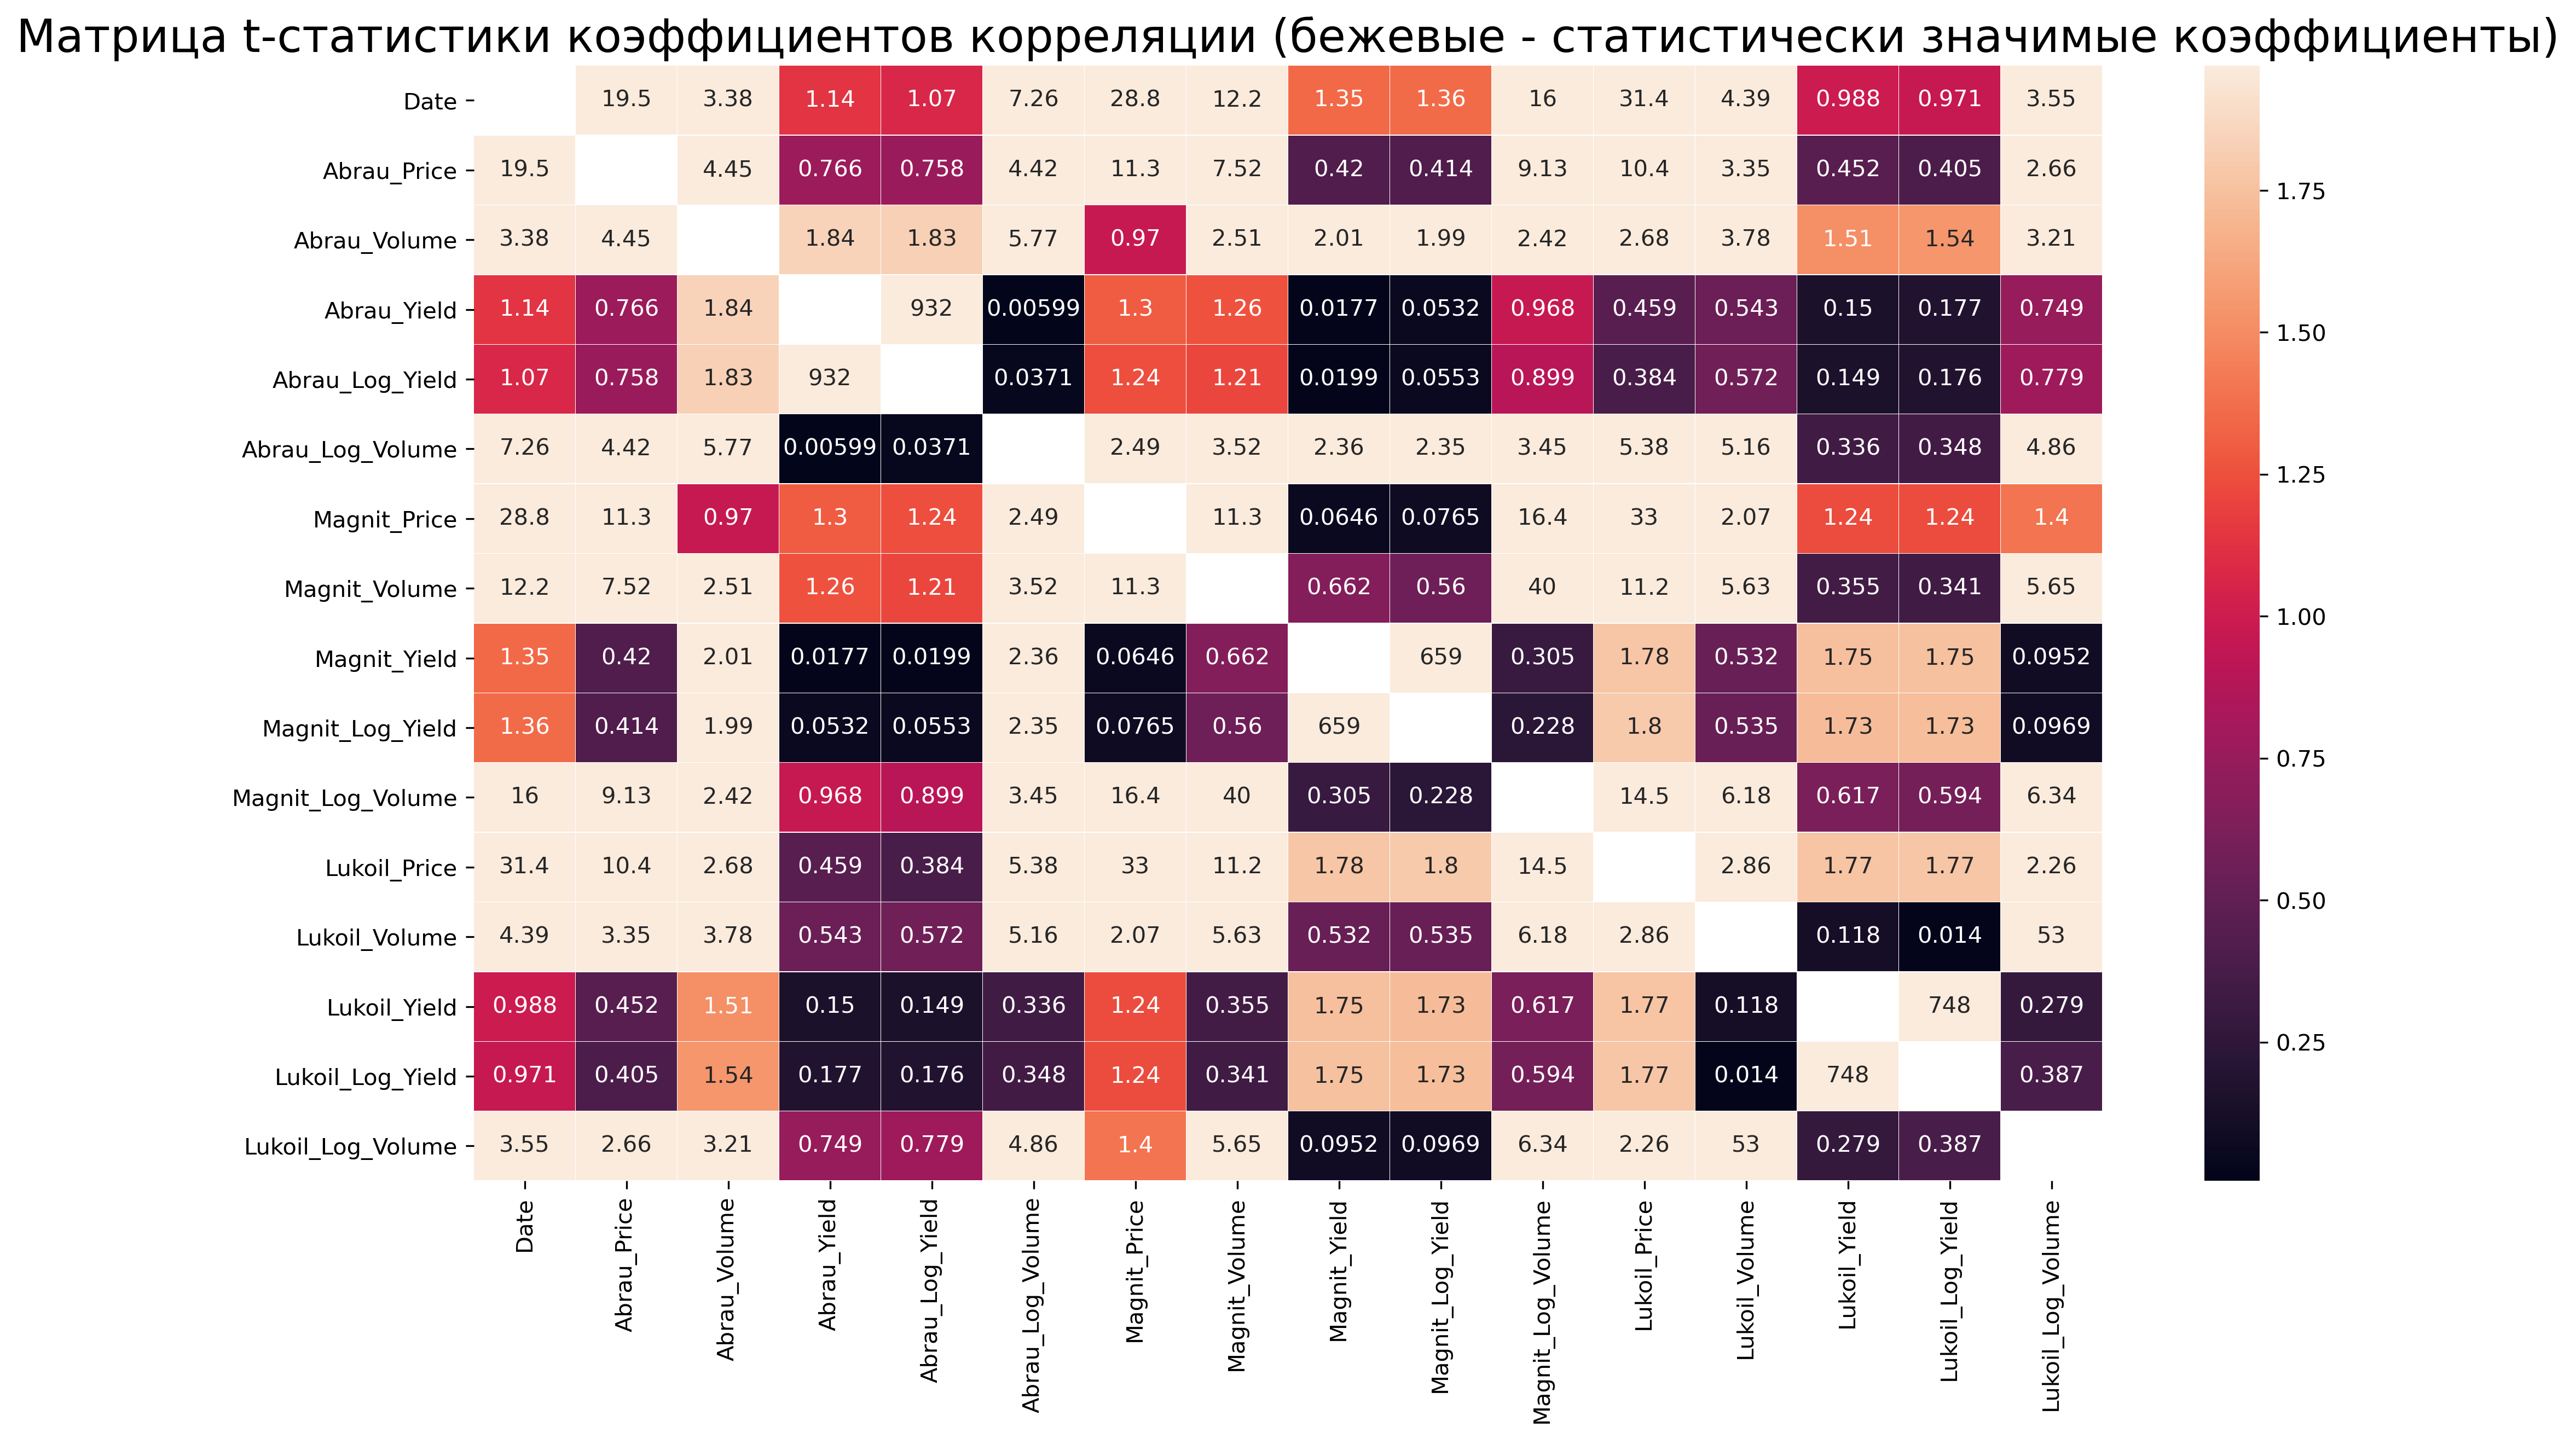

In [64]:
t_corrmat = abs(clear_full.corr()*((len(clear_full['Date']) - 2)/(1-(clear_full.corr())**2))**(0.5))
f, ax = plt.subplots(figsize =(16, 9), dpi = 300)
sns.heatmap(t_corrmat, ax = ax, linewidths = 0.1, annot = True, vmax = 1.9696,fmt='.3g')
ax.set_title('Матрица t-статистики коэффициентов корреляции (бежевые - статистически значимые коэффициенты)', size = 20)
plt.show()